In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path
from P06_no_af.T00_lib.utils import check_jupyter


In [3]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent / "T02_combine_features"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_run_diff_sigma/T02_combine_features"
    CURRENT_DIR = Path(__file__).resolve().parent

Code is running in a Jupyter environment.


In [4]:
df = pd.read_excel(CURRENT_DIR / "S03_calculate_performance.xlsx")

In [5]:
df

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test
0,1,0.3,ElasticNet,Y-1,0.931696,1.245162,1.254612,1.286200,0.068304,0.025953
1,1,0.3,ElasticNet,Y-2,0.993594,0.819632,1.026174,0.981619,0.006406,0.000479
2,1,0.3,ElasticNet,Y-3,0.702147,0.647945,1.321208,1.321814,0.297853,0.240386
3,1,0.3,ElasticNet,Y-All,0.875812,0.904246,1.200665,1.196544,0.124188,0.088939
4,2,0.3,ElasticNet,Y-1,0.941560,0.900445,1.280098,1.202644,0.058440,-0.032014
...,...,...,...,...,...,...,...,...,...,...
115,4,0.3,XGBR,Y-All,0.793827,0.884430,1.376656,1.243381,0.206173,0.117694
116,5,0.3,XGBR,Y-1,0.859531,1.181837,25.872402,1.482817,0.140469,-0.013410
117,5,0.3,XGBR,Y-2,0.939018,0.853186,1.472605,1.310196,0.060982,-0.114376
118,5,0.3,XGBR,Y-3,0.645146,0.581640,1.403567,0.993626,0.354854,0.388043


In [6]:
filt = df["Y"] != "Y-All"
df_filt = df[filt]


(-0.15, 0.6)

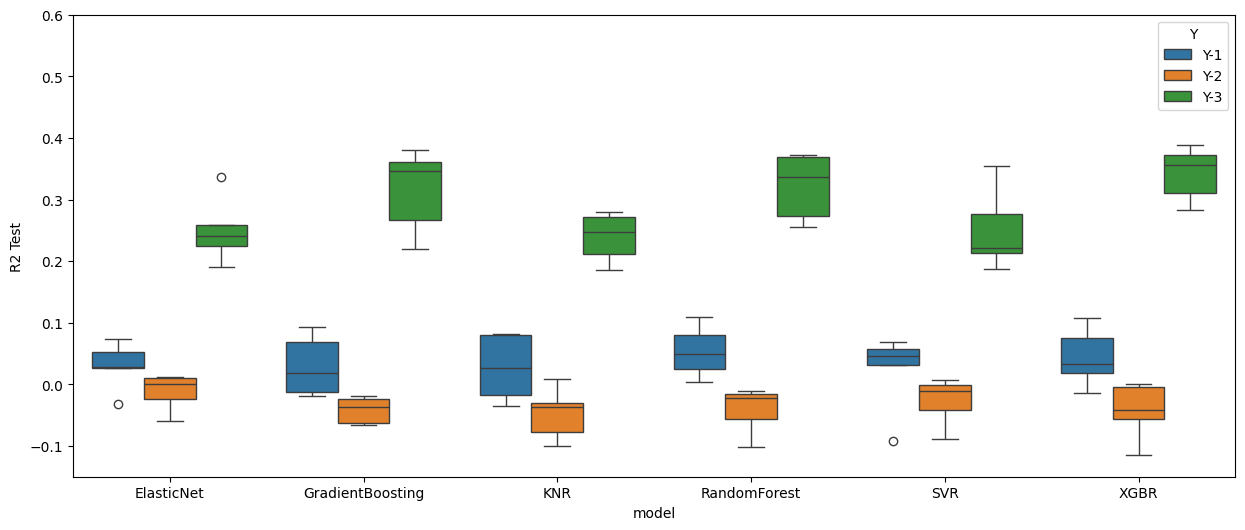

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(df_filt, x="model", y="R2 Test", hue="Y", ax=ax)
ax.set_ylim(-0.15, 0.6)